In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'bike_sharing_cleaned.csv'
df = pd.read_csv(file_path)

df.head()


,datetime,count,year,month,day,hour,weekday,is_weekend,is_working_hour,season,is_holiday
0,2011-01-20 00:00:00,51,2011,1,20,0,3,0,0,4,0
1,2011-01-20 01:00:00,58,2011,1,20,1,3,0,0,4,1
2,2011-01-20 02:00:00,72,2011,1,20,2,3,0,0,4,0
3,2011-01-20 03:00:00,79,2011,1,20,3,3,0,0,4,0
4,2011-01-20 04:00:00,91,2011,1,20,4,3,0,0,4,0


In [5]:
# Check for missing values
print(df.isnull().sum())

# Check data shape 
print(df.shape)

# Summary statistics
print(df.describe())


datetime           0
count              0
year               0
month              0
day                0
hour               0
weekday            0
is_weekend         0
is_working_hour    0
season             0
is_holiday         0
dtype: int64
(6493, 11)
             count         year        month          day         hour  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean    189.545049  2011.503619     6.565070    25.224550    11.555367   
std      75.332618     0.500025     3.429462     3.339411     6.912526   
min      25.000000  2011.000000     1.000000    20.000000     0.000000   
25%     125.000000  2011.000000     4.000000    22.000000     6.000000   
50%     197.000000  2012.000000     7.000000    25.000000    12.000000   
75%     252.000000  2012.000000    10.000000    28.000000    18.000000   
max     359.000000  2012.000000    12.000000    31.000000    23.000000   

           weekday   is_weekend  is_working_hour       season   is_holiday  
c

In [6]:
X = df[['hour', 'weekday', 'is_weekend', 'is_working_hour', 'season', 'is_holiday', 'month', 'year']]
y = df['count']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
model = RandomForestRegressor(
    n_estimators=100, 
    random_state=42
)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
y_pred = model.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 12.25
R² Score: 1.00


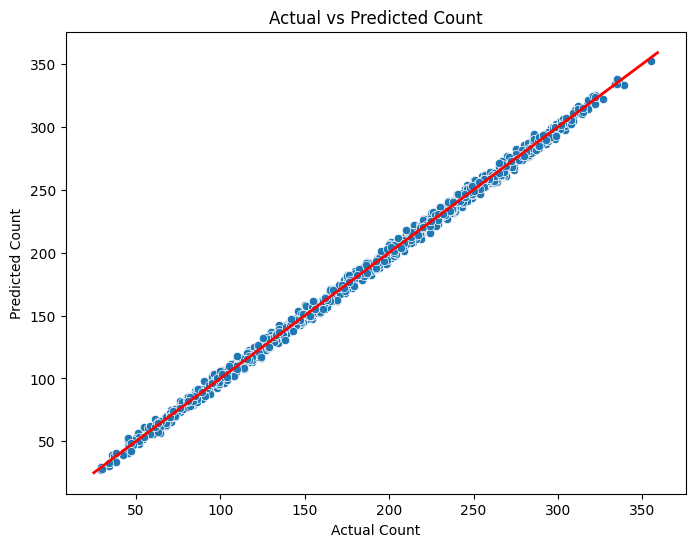

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Actual vs Predicted Count")
plt.show()


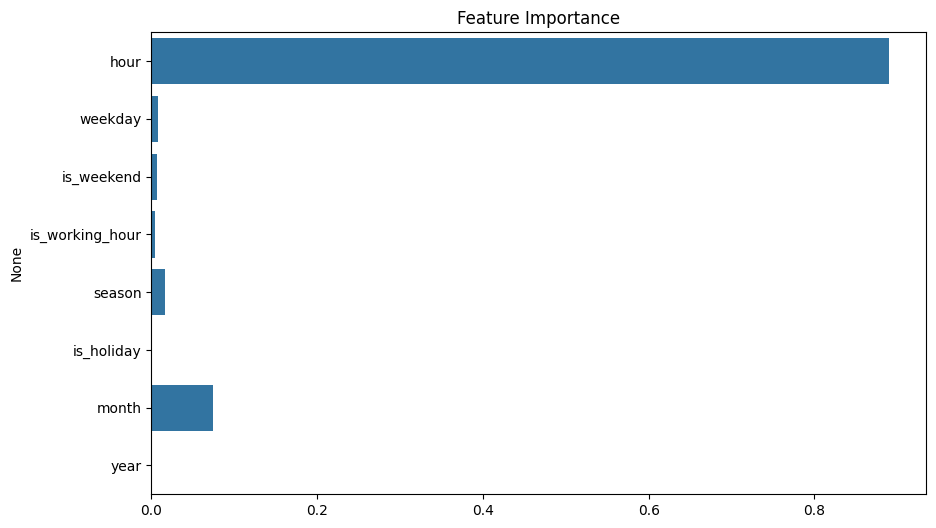

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [13]:
model = RandomForestRegressor(
    n_estimators=200,          # Increase trees for better accuracy
    max_depth=10,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Minimum samples per split
    min_samples_leaf=2,        # Minimum samples per leaf
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 10.32
R² Score: 1.00


In [14]:
sample = np.array([[15, 7, 1, 1, 3, 0, 5, 2025]])
sample = sample.reshape(1, -1)

predicted_count = model.predict(sample)
print(f"Predicted rentals: {int(predicted_count[0])}")


Predicted rentals: 239


C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [16]:
import joblib

joblib.dump(model, 'bike_sharing_model.pkl')

model = joblib.load('bike_sharing_model.pkl')
